In [102]:
import pandas as pd
import numpy as np
import pyexcel_xlsx
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [76]:
data = pd.read_excel(r'/Users/lszczyrba/Project_3.6.3/HelloWorld/Irma_Sediment/IrmaMudThicknessComparisonsJuneUpdate.xlsx', header = [1])
df = pd.DataFrame(data)

In [77]:
df.insert(0,'ID', range(0,len(df)))

df.set_index('ID')

df['Date1'] = pd.to_datetime(df['Date1'])
df['Date2'] = pd.to_datetime(df['Date2'])
df['Date3'] = pd.to_datetime(df['Date3'])
print(type(df['Date1'][1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [78]:
no_null = df.dropna()
df = no_null

In [79]:
df = df[df['ThicknessD1cm'] != 0]

In [80]:
df = df[df.Notes == 1]

In [81]:
df = df.drop(['Notes'], axis=1)

In [82]:
df.ThicknessD3cm.replace([20], [1], inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 1 to 102
Data columns (total 12 columns):
ID               75 non-null int64
Region           75 non-null object
Site             75 non-null object
Station          75 non-null object
Date1            75 non-null datetime64[ns]
Date2            75 non-null datetime64[ns]
Date3            75 non-null datetime64[ns]
ThicknessD1cm    75 non-null float64
ThicknessD2cm    75 non-null float64
ThicknessD3cm    75 non-null float64
Lat              75 non-null float64
Lon              75 non-null float64
dtypes: datetime64[ns](3), float64(5), int64(1), object(3)
memory usage: 7.6+ KB


,ID,Region,Site,Station,Date1,Date2,Date3,ThicknessD1cm,ThicknessD2cm,ThicknessD3cm,Lat,Lon
1,1,TTI,UFU,UFU MUD 20,2017-12-18,2018-01-27,2018-06-19,0.5,1.0,1.00,25.90149,-81.51028
2,2,TTI,UFU,UFU MUD 19,2017-12-18,2018-01-27,2018-06-19,1.0,0.5,0.75,25.90153,-81.51034
3,3,TTI,UFU,UFU MUD 18,2017-12-18,2018-01-27,2018-06-19,0.5,1.5,0.50,25.90156,-81.51039
4,4,TTI,UFU,UFU MUD 17,2017-12-18,2018-01-27,2018-06-19,1.0,1.0,0.50,25.90160,-81.51041
5,5,TTI,UFU,UFU MUD 16,2017-12-18,2018-01-27,2018-06-19,1.0,0.5,1.50,25.90165,-81.51049


In [83]:
dateframe = df['Date1'].append(df['Date2'].append(df['Date3'])).reset_index(drop=True)
df_time = pd.DataFrame(dateframe)
df_time.info()

thickframe = df['ThicknessD1cm'].append(df['ThicknessD2cm'].append(df['ThicknessD3cm'])).reset_index(drop=True)
df_thick = pd.DataFrame(thickframe)
df_thick.info()

df_site = df['Site'].append(df['Site'].append(df['Site'])).reset_index(drop=True)

df_station = df['Station'].append(df['Station'].append(df['Station'])).reset_index(drop=True)

timethick_concat= pd.concat([df_site,df_station, df_time, df_thick],ignore_index=True, axis=1)

timethick_concat = timethick_concat.rename(columns= {0:'Site',1:'Station', 2:'Date', 3:'Thickness'})

timethick_concat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 1 columns):
0    225 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 1 columns):
0    225 non-null float64
dtypes: float64(1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
Site         225 non-null object
Station      225 non-null object
Date         225 non-null datetime64[ns]
Thickness    225 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.1+ KB


In [91]:
grouped = timethick_concat.groupby('Site')
print(grouped.size())
grouped.head()

Site
BW2    36
BW3    27
CBD    12
LAD    33
SNK    24
UFU    57
WTZ    36
dtype: int64


,Site,Station,Date,Thickness
0,UFU,UFU MUD 20,2017-12-18,0.50
1,UFU,UFU MUD 19,2017-12-18,1.00
2,UFU,UFU MUD 18,2017-12-18,0.50
3,UFU,UFU MUD 17,2017-12-18,1.00
4,UFU,UFU MUD 16,2017-12-18,1.00
19,CBD,S16,2017-11-19,1.00
20,CBD,S17,2017-11-19,1.00
21,CBD,S15,2017-11-19,1.00
22,CBD,S18,2017-11-19,1.00
23,BW2,BW2 S5,2017-12-19,5.00


In [93]:
BW2 = timethick_concat[timethick_concat['Site'] == 'BW2']
BW3 = timethick_concat[timethick_concat['Site'] == 'BW3']
CBD = timethick_concat[timethick_concat['Site'] == 'CBD']
LAD = timethick_concat[timethick_concat['Site'] == 'LAD']
SNK = timethick_concat[timethick_concat['Site'] == 'SNK']
UFU = timethick_concat[timethick_concat['Site'] == 'UFU']
WTZ = timethick_concat[timethick_concat['Site'] == 'WTZ']


BW2_StationGroup = BW2.groupby('Station')
BW3_StationGroup = BW3.groupby('Station')
CBD_StationGroup = CBD.groupby('Station')
LAD_StationGroup = LAD.groupby('Station')
SNK_StationGroup = SNK.groupby('Station')
UFU_StationGroup = UFU.groupby('Station')
WTZ_StationGroup = WTZ.groupby('Station')



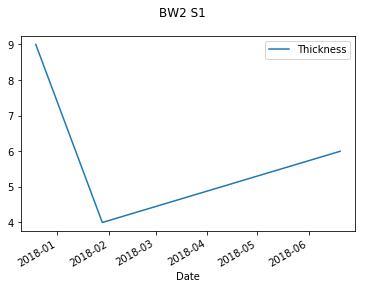

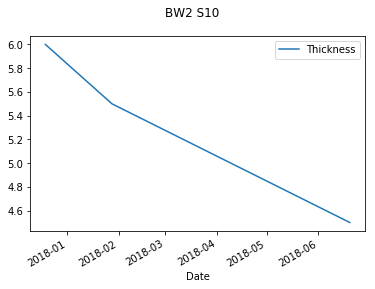

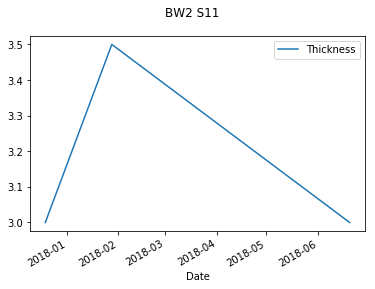

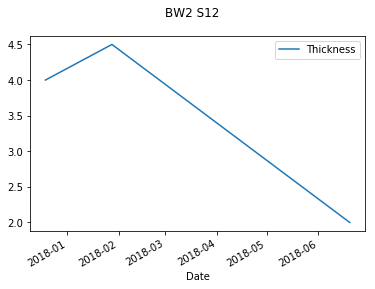

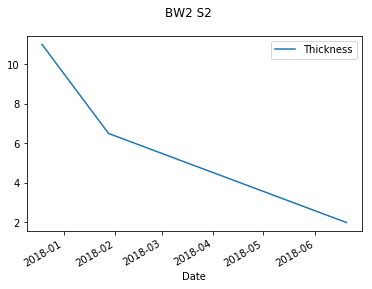

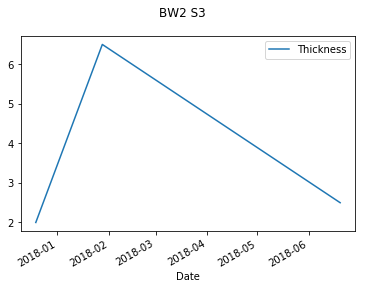

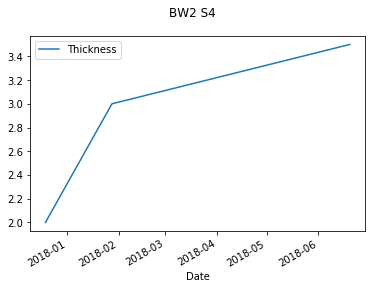

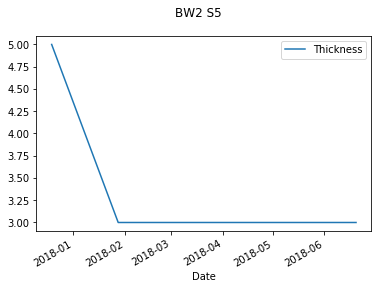

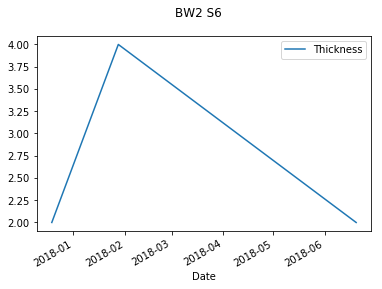

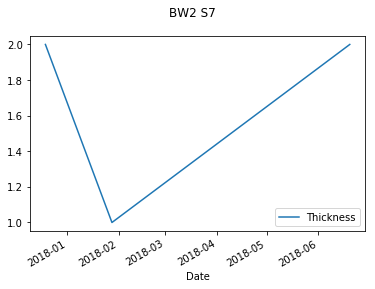

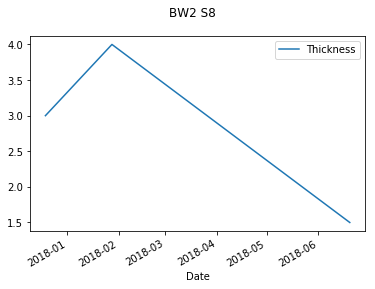

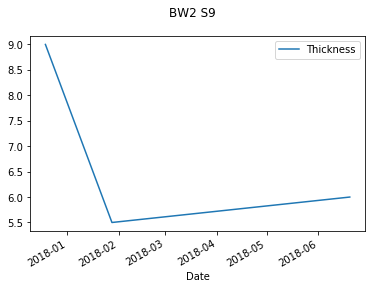

In [96]:
 for name, group in BW2_StationGroup:
    group.plot.line(x = 'Date', y = 'Thickness', title = '{}'.format(name))
#     plt.savefig('{}_DatevThick.png'.format(name))

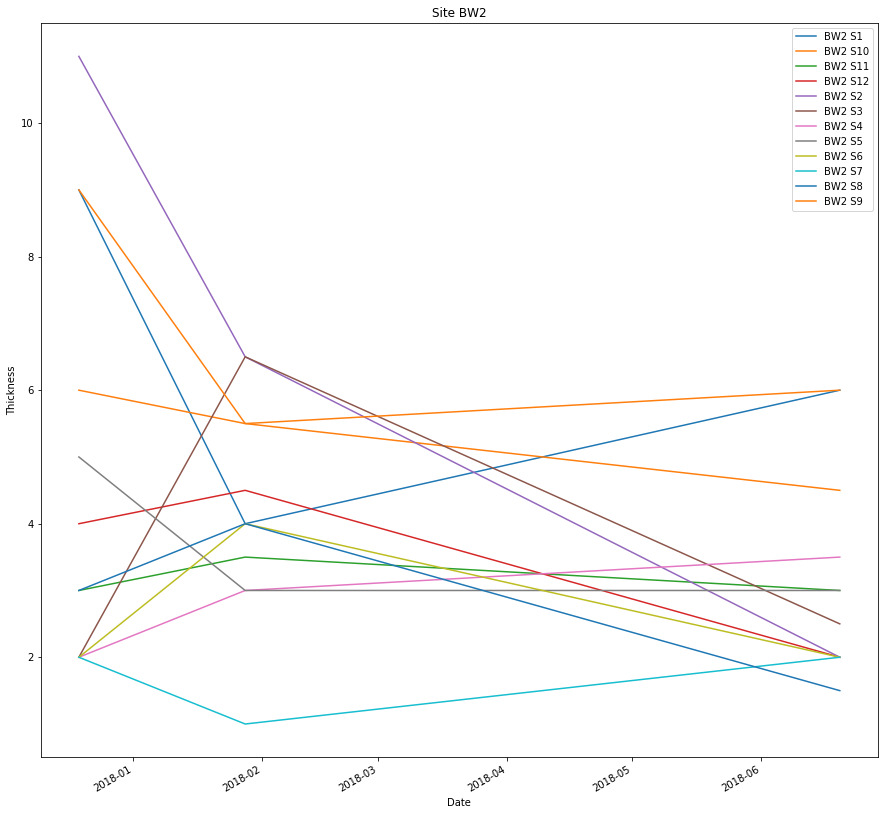

In [152]:
fig, ax = subplots()
for name, group in BW2_StationGroup:
    BW2_Fig = group.plot.line(x = 'Date', y = 'Thickness', ax = ax, figsize = (15,15), title = 'Site BW2', label = name)    
    BW2_Fig.set_ylabel('Thickness')
plt.savefig('BW2_DatevThick_Line.png')

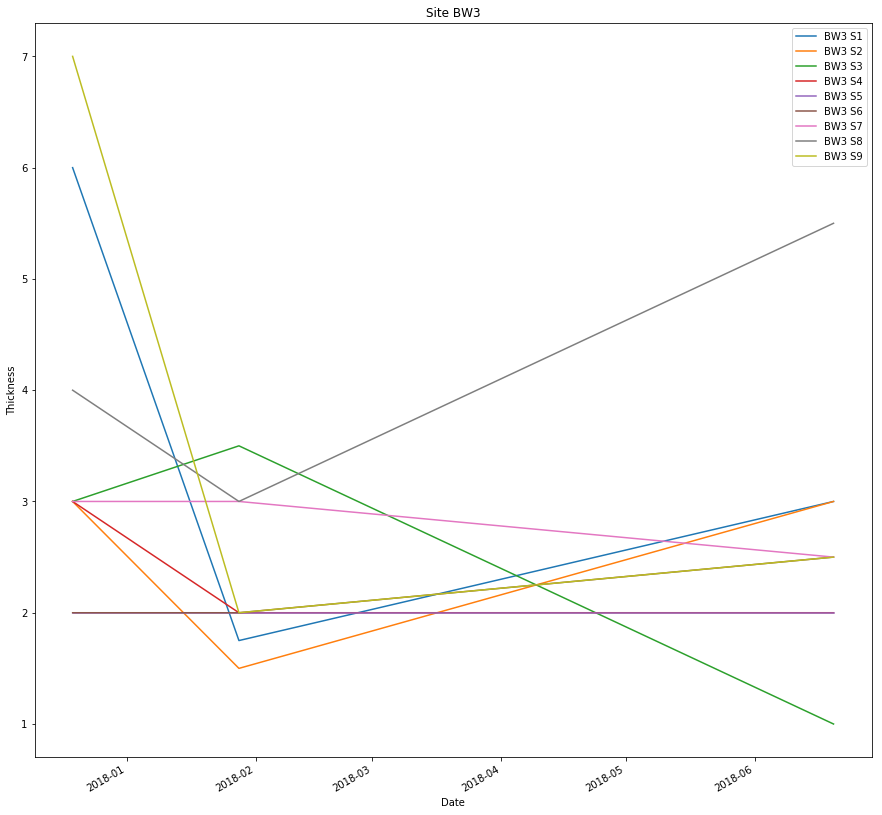

In [153]:
fig, ax = subplots()
for name, group in BW3_StationGroup:
    BW3_Fig = group.plot.line(x = 'Date', y = 'Thickness', ax = ax, figsize = (15,15), title = 'Site BW3', label = name)    
    BW3_Fig.set_ylabel('Thickness')
plt.savefig('BW3_DatevThick_Line.png')

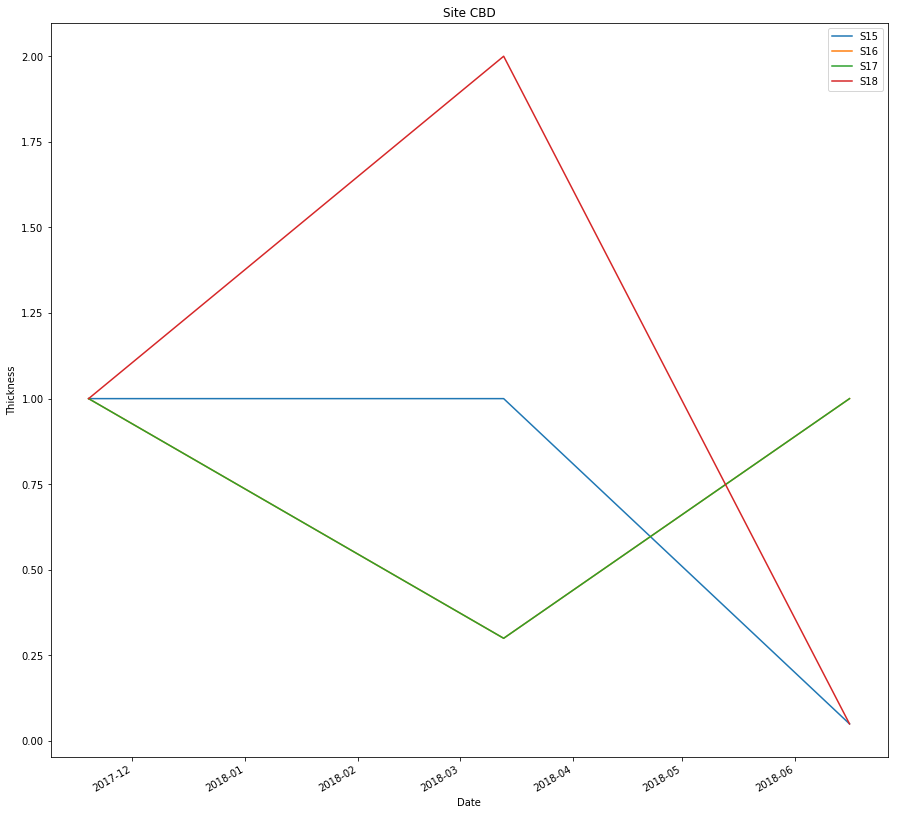

In [154]:
fig, ax = subplots()
for name, group in CBD_StationGroup:
    CBD_Fig = group.plot.line(x = 'Date', y = 'Thickness', ax = ax, figsize = (15,15), title = 'Site CBD', label = name)    
    CBD_Fig.set_ylabel('Thickness')
plt.savefig('CBD_DatevThick_Line.png')

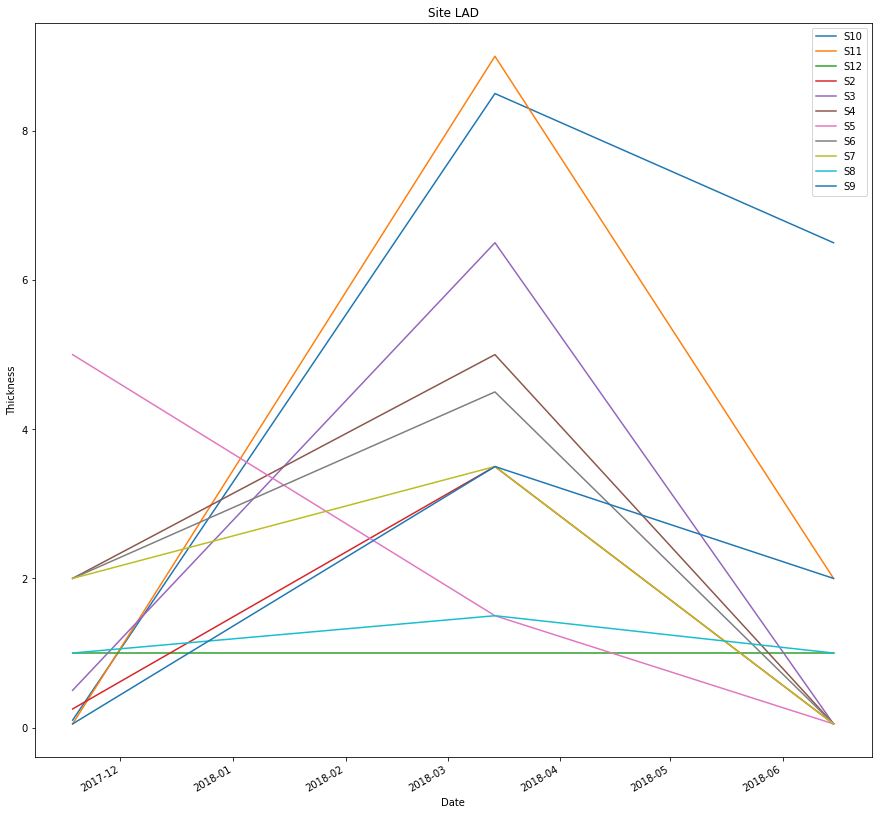

In [158]:
fig, ax = subplots()
for name, group in LAD_StationGroup:
    LAD_Fig = group.plot.line(x = 'Date', y = 'Thickness', ax = ax, figsize = (15,15), title = 'Site LAD', label = name)    
    LAD_Fig.set_ylabel('Thickness')
plt.savefig('LAD_DatevThick_Line.png')

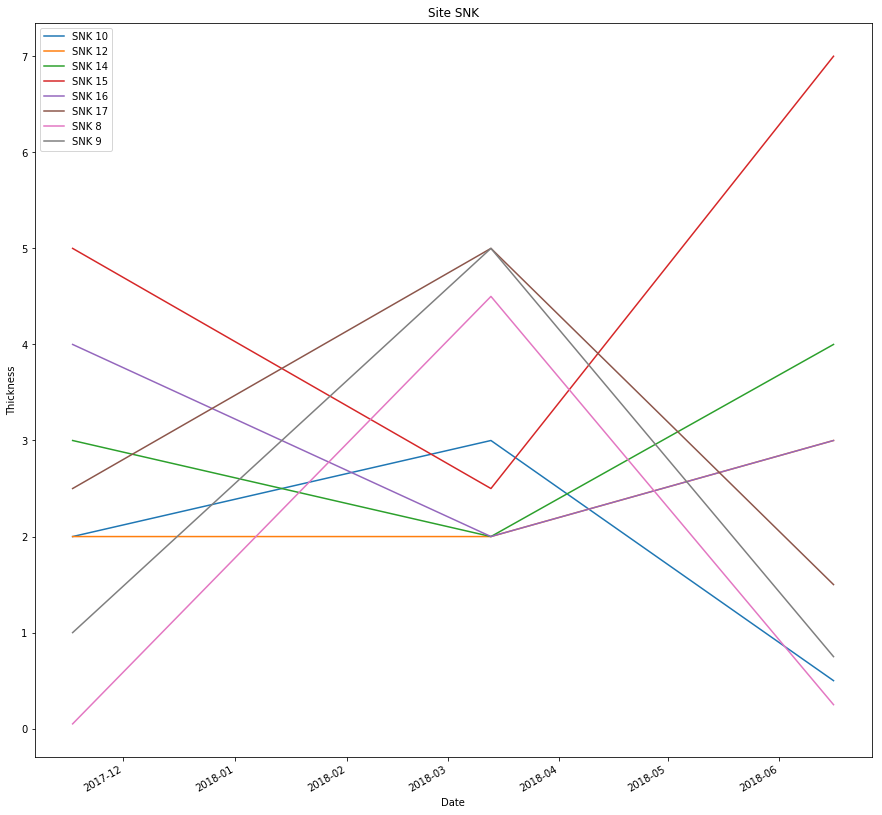

In [155]:
fig, ax = subplots()
for name, group in SNK_StationGroup:
    SNK_Fig = group.plot.line(x = 'Date', y = 'Thickness', ax = ax, figsize = (15,15), title = 'Site SNK', label = name)    
    SNK_Fig.set_ylabel('Thickness')
plt.savefig('SNK_DatevThick_Line.png')

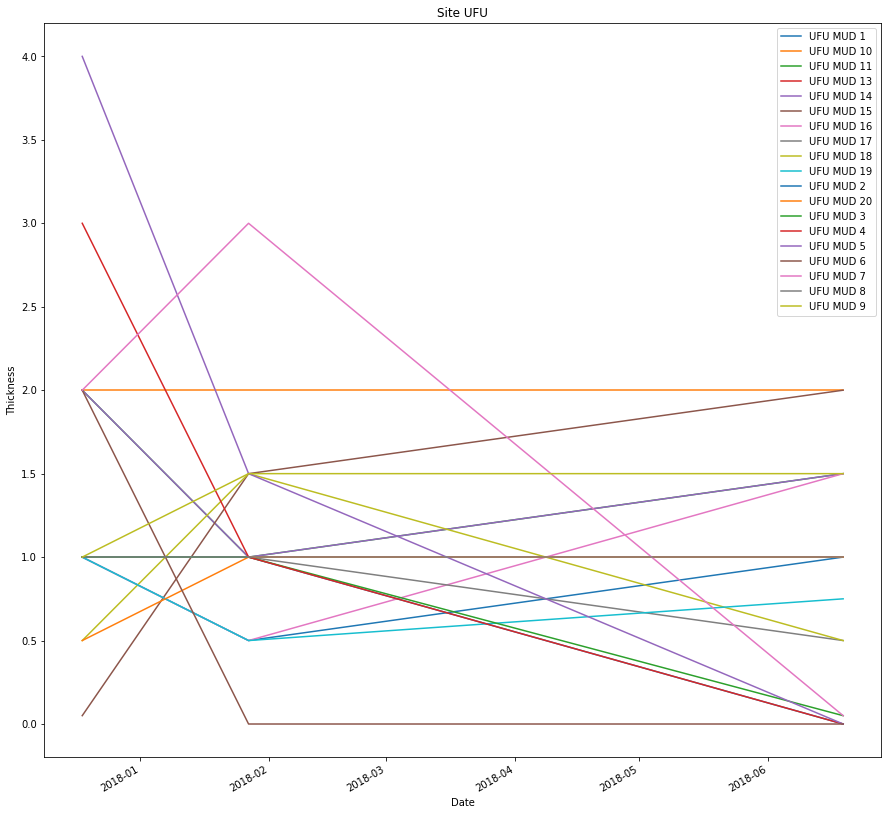

In [156]:
fig, ax = subplots()
for name, group in UFU_StationGroup:
    UFU_Fig = group.plot.line(x = 'Date', y = 'Thickness', ax = ax, figsize = (15,15), title = 'Site UFU', label = name)    
    UFU_Fig.set_ylabel('Thickness')
plt.savefig('UFU_DatevThick_Line.png')

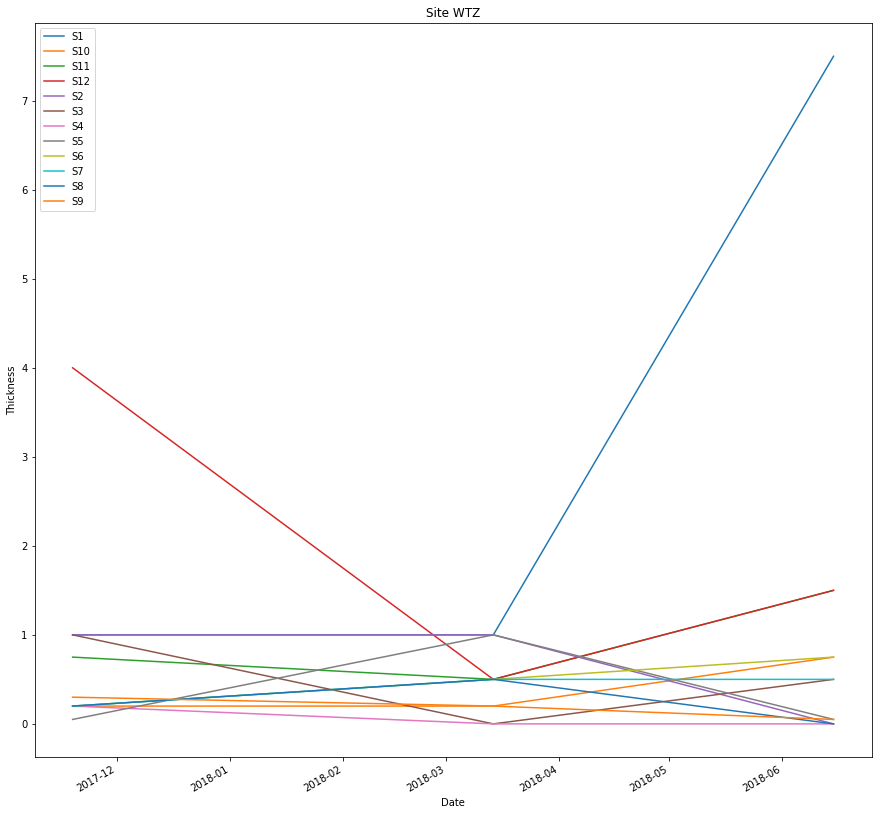

In [157]:
fig, ax = subplots()
for name, group in WTZ_StationGroup:
    WTZ_Fig = group.plot.line(x = 'Date', y = 'Thickness', ax = ax, figsize = (15,15), title = 'Site WTZ', label = name)    
    WTZ_Fig.set_ylabel('Thickness')
plt.savefig('WTZ_DatevThick_Line.png')

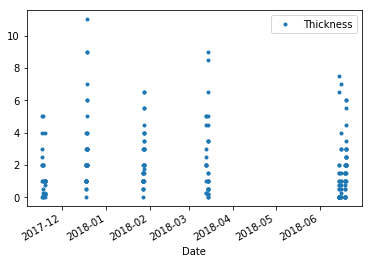

In [25]:
timethick_concat.plot(x = 'Date', y = 'Thickness', style = '.')
plt.savefig('Sites_DatevThick.png')